<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Machine%20Learning%20Course/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> **Credit Card Fraud Detection using Logistics Regression** 

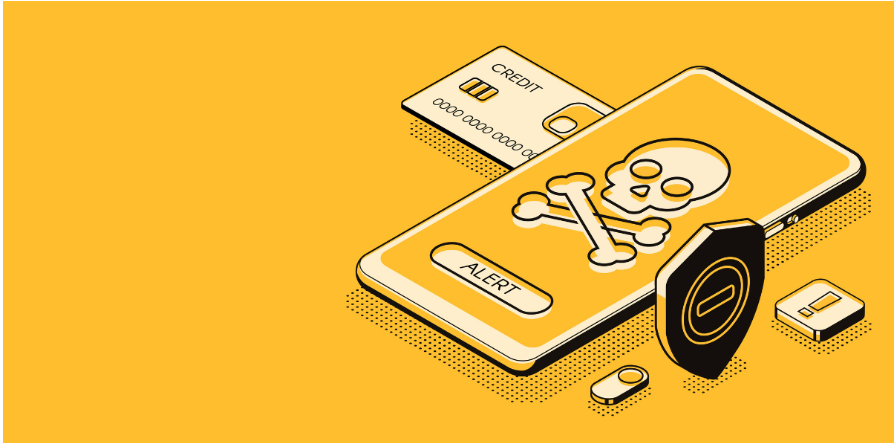

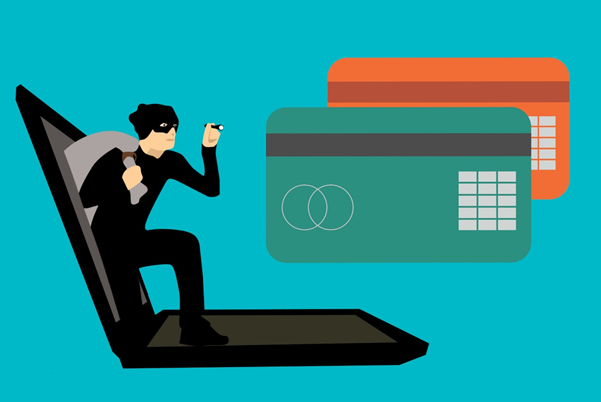

As we are moving towards the digital world — cybersecurity is becoming a crucial part of our life. When we talk about security in digital life then the main challenge is to find the abnormal activity.

Detecting fraud transactions is of great importance for any credit card company. We are tasked by a well-known company to detect potential frauds so that customers are not charged for items that they did not purchase. So the goal is to build a classifier that tells if a transaction is a fraud or not.

Follow this link to download the dataset:
https://drive.google.com/uc?export=download&id=1RpB3_AkS8iGbjX0khJlujDrGKyB2Fzuz

# Logistics Regression - Data Analytics

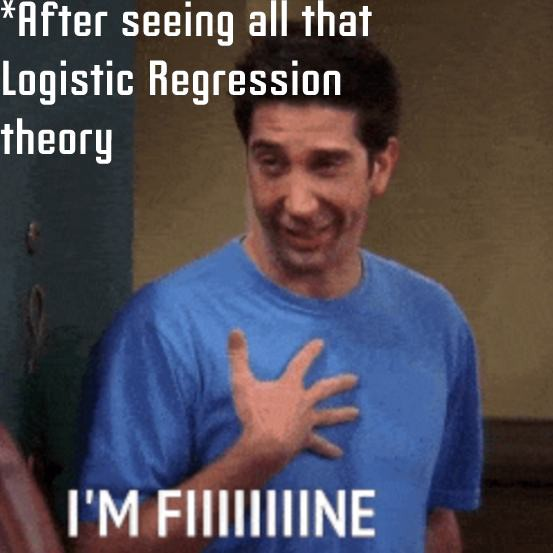

Glad we have so many useful Machine Learning libraries, so anyone who knows quite coding can implement any ML model.

Importing the dataset using google colab function

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1RpB3_AkS8iGbjX0khJlujDrGKyB2Fzuz'
'''or from google.colab import files
uploaded = files.upload()'''

'or from google.colab import files\nuploaded = files.upload()'

Importing essential libraries for data understanding and Exploratory Data Analysis 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Variables

In [ ]:
# importing dataset
df = pd.read_csv(url)
df.head()

,CUST_ID,AGE,GENDER,QUALIFICATION,FAMILY_STATUS,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,TARGET_DEFAULT
0,18064,56,2,1,1,242550.0,-1,-1,-2,-2,...,0.00,0.00,0.00,181.91,330.75,6492.62,0.00,0.00,0.00,0
1,24524,36,2,1,1,110250.0,-2,-2,0,0,...,27862.38,57013.58,104512.59,0.00,0.00,0.00,0.00,1102.50,2892.96,0
2,40165,26,1,1,2,88200.0,0,0,0,0,...,76661.24,85817.50,85330.19,1653.75,2553.39,1671.39,1314.18,3099.13,3669.12,0
3,18744,28,2,1,2,264600.0,0,0,0,0,...,18416.16,32092.67,33265.73,4410.00,2756.25,0.00,3865.36,4410.00,5522.42,0
4,15813,36,1,2,2,55125.0,-2,-2,2,2,...,54463.50,56152.53,51499.98,0.00,0.00,0.00,2205.00,0.00,5512.50,0


In [ ]:
# print the columns(feature variables) of the dataset
print(df.columns)

Index(['CUST_ID', 'AGE', 'GENDER', 'QUALIFICATION', 'FAMILY_STATUS',
       'CC_LIMIT', 'APR_PAY', 'MAY_PAY', 'JUN_PAY', 'JUL_PAY', 'AUG_PAY',
       'SEPT_PAY', 'APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL',
       'SEPT_BILL', 'APR_PAID', 'MAY_PAID', 'JUN_PAID', 'JUL_PAID', 'AUG_PAID',
       'SEPT_PAID', 'TARGET_DEFAULT'],
      dtype='object')


'TARGET_DEFAULT' is our dependent/target variable which we are going to predict and others are independent variable.

## Missing Data

In [ ]:
# To check the missing data
df.isnull()

,CUST_ID,AGE,GENDER,QUALIFICATION,FAMILY_STATUS,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,TARGET_DEFAULT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# to check total missing values each column
df.isnull().sum()

CUST_ID           0
AGE               0
GENDER            0
QUALIFICATION     0
FAMILY_STATUS     0
CC_LIMIT          0
APR_PAY           0
MAY_PAY           0
JUN_PAY           0
JUL_PAY           0
AUG_PAY           0
SEPT_PAY          0
APR_BILL          0
MAY_BILL          0
JUN_BILL          0
JUL_BILL          0
AUG_BILL          0
SEPT_BILL         0
APR_PAID          0
MAY_PAID          0
JUN_PAID          0
JUL_PAID          0
AUG_PAID          0
SEPT_PAID         0
TARGET_DEFAULT    0
dtype: int64

It shows that we don't have any missing values in any columns. 

## Data Types

In [ ]:
# To check the data types of each column
datatypes = df.dtypes
print(datatypes)

CUST_ID             int64
AGE                 int64
GENDER              int64
QUALIFICATION       int64
FAMILY_STATUS       int64
CC_LIMIT          float64
APR_PAY             int64
MAY_PAY             int64
JUN_PAY             int64
JUL_PAY             int64
AUG_PAY             int64
SEPT_PAY            int64
APR_BILL          float64
MAY_BILL          float64
JUN_BILL          float64
JUL_BILL          float64
AUG_BILL          float64
SEPT_BILL         float64
APR_PAID          float64
MAY_PAID          float64
JUN_PAID          float64
JUL_PAID          float64
AUG_PAID          float64
SEPT_PAID         float64
TARGET_DEFAULT      int64
dtype: object


As you can see here, for continuous variables(variables containing continuous values) we have 'float64' as our dtype while for discrete variables, we have 'object'(category has string values) or 'int64'(category has integer values) as our dtype.

## EDA - Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

In [ ]:
# To check percentage count of FAMILY_STATUS variable
df["FAMILY_STATUS"].value_counts()

2    5298
1    4583
3     102
0      17
Name: FAMILY_STATUS, dtype: int64

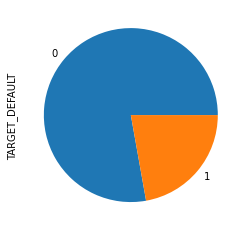

In [ ]:
# To check percentage of TARGET_DEFAULT and plot a pie chart
df["TARGET_DEFAULT"].value_counts(normalize=True).plot.pie()

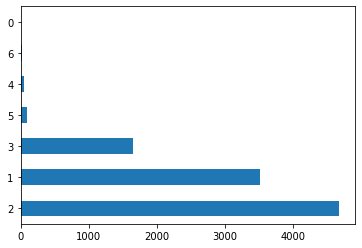

In [ ]:
#plot the bar graph of count of QUALIFICATION
df["QUALIFICATION"].value_counts().plot.barh()
plt.show()

In [ ]:
# If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc.
df.CC_LIMIT.describe() 

count     10000.000000
mean     184810.972500
std      142715.991271
min       11025.000000
25%       55125.000000
50%      154350.000000
75%      264600.000000
max      882000.000000
Name: CC_LIMIT, dtype: float64

## EDA - Bivariate Analysis
If we analyze data by taking two variables into consideration from a dataset, it is known as Bivariate Analysis.

In [ ]:
# Check the count distribution of target_variables accross family status
df.groupby(["FAMILY_STATUS"])["TARGET_DEFAULT"].value_counts()

FAMILY_STATUS  TARGET_DEFAULT
0              0                   14
               1                    3
1              0                 3508
               1                 1075
2              0                 4187
               1                 1111
3              0                   72
               1                   30
Name: TARGET_DEFAULT, dtype: int64

This shows that mostly people with average qualification opt for credit. People with zero qualification are never taken positively with respect to TARGET_DEFAULT. Qualification 6 has highest positive rate among all qualification classes.

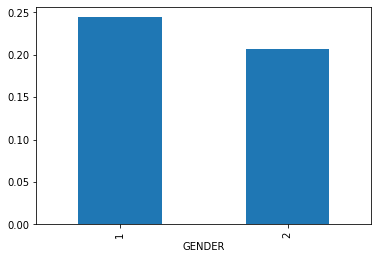

In [ ]:
# Check the mean distribution of target_variables accross gender
df.groupby(["GENDER"])["TARGET_DEFAULT"].mean().plot.bar()  

Gender 1 has more chances to be positive with target than gender 2. It shows average TARGET_DEFAULT value accross genders.

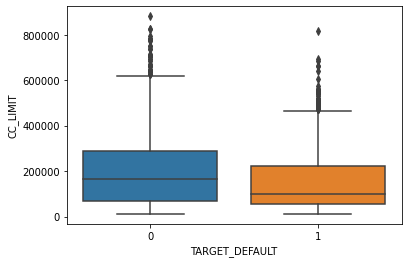

In [ ]:
# create a box plot for CC_LIMIT vs TARGET_DEFAULT
sns.boxplot(y=df.CC_LIMIT,x=df.TARGET_DEFAULT)
plt.show()

What is a Box Plot?

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. 

For example, we see that the positive rate has less mean, median and Q1,Q3 CC_LIMIT values than negative rate of TARGET_DEFAULT. 

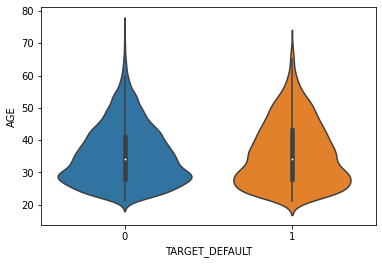

In [ ]:
# create a violin plot for AGE vs TARGET_DEFAULT
sns.violinplot(x=df.TARGET_DEFAULT,y=df.AGE)
plt.show()

What is use of Violin Plot then?

A Violin Plot is used to visualise the distribution of the data and its probability density. 

For example, in the above plot we see that for positive rate, most of the probablility density for positive rate is high around mid-20s while for negative rate, it is at around 30. The median and mean for both classes is almost same and thus is the general distribution among both classes.

Boxplot and Violinplot are essential data visualization curves. For both plots, Y-axes have continuous feature column while X-axes have categorical feature column.

## EDA - Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

In [ ]:
# Analyse all the September Month Bank transactions for each class of qualification
print(df.groupby(["QUALIFICATION"]).mean()[["SEPT_PAY","SEPT_BILL","SEPT_PAID"]])

               SEPT_PAY      SEPT_BILL     SEPT_PAID
QUALIFICATION                                       
0             -0.714286    9200.678571   7100.888571
1             -0.222792   52178.647188   6945.484658
2              0.086008   58414.995282   5321.882709
3              0.129540   49094.994165   5249.598208
4             -0.433962   57253.116604   7590.317736
5             -0.080460   97868.228966   9999.079770
6             -0.176471  112274.774706  18098.964118


In [ ]:
df.columns

Index(['CUST_ID', 'AGE', 'GENDER', 'QUALIFICATION', 'FAMILY_STATUS',
       'CC_LIMIT', 'APR_PAY', 'MAY_PAY', 'JUN_PAY', 'JUL_PAY', 'AUG_PAY',
       'SEPT_PAY', 'APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL',
       'SEPT_BILL', 'APR_PAID', 'MAY_PAID', 'JUN_PAID', 'JUL_PAID', 'AUG_PAID',
       'SEPT_PAID', 'TARGET_DEFAULT'],
      dtype='object')

In [ ]:
# Analyse all the Months Bank transactions for each class of GENDER using groupby method
df.groupby(["GENDER"])[df.columns[6:-1]].mean()

,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,AUG_PAY,SEPT_PAY,APR_BILL,MAY_BILL,JUN_BILL,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID
GENDER,,,,,,,,,,,,,,,,,,
1,-0.234999,-0.196837,-0.152649,-0.079337,-0.026111,0.086869,42108.217904,43792.365679,47278.321516,51885.272297,54512.010003,57191.849254,5463.443043,5045.219402,5335.336309,5804.731725,6477.067994,6159.436214
2,-0.365631,-0.341865,-0.304803,-0.263753,-0.224863,-0.091408,40947.681720,42238.887110,45204.045375,49084.161178,50976.462722,53682.991753,5684.773600,5210.406881,5283.977007,5409.970595,6337.466658,5820.513233


QUALIFICATION    0         1         2         3         4    5    6
AGE                                                                 
21             NaN  0.333333  0.105263  0.000000       NaN  0.0  NaN
22             NaN  0.400000  0.252252  0.360000  0.000000  0.0  1.0
23             NaN  0.270833  0.271676  0.210526  0.000000  0.5  NaN
24             NaN  0.223301  0.299145  0.333333  0.000000  0.0  NaN
25             NaN  0.244094  0.273585  0.264706  0.333333  0.0  NaN
26             NaN  0.184211  0.184080  0.268293  0.000000  0.0  NaN
27             NaN  0.190045  0.254545  0.297872  0.000000  0.0  NaN
28             0.0  0.156398  0.245192  0.291667  0.000000  0.0  NaN
29             NaN  0.152985  0.193833  0.304348  0.000000  0.0  NaN
30             0.0  0.164444  0.247664  0.317073  0.000000  0.0  NaN
31             NaN  0.180851  0.244048  0.266667       NaN  0.0  NaN
32             NaN  0.175325  0.176136  0.125000  0.000000  0.0  0.0
33             NaN  0.189542  0.19

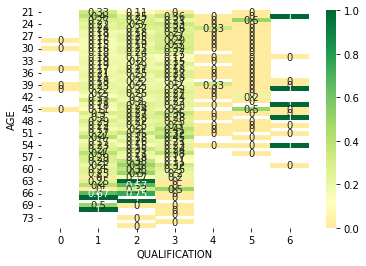

In [ ]:
# create pivot table of AGE vs QUALIFICATION vs TARGET_DEFAULT
result = pd.pivot_table(data=df, index='AGE', columns='QUALIFICATION',values='TARGET_DEFAULT')
print(result)

# create heat map for the same
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

From this analysis, we can say that qualification class 0 has no positive rate and while 1,2,3 has pretty fair chances and among that for age around 65 has higher positive rate. The more green is the heat map, more are chances for that group to be positive.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


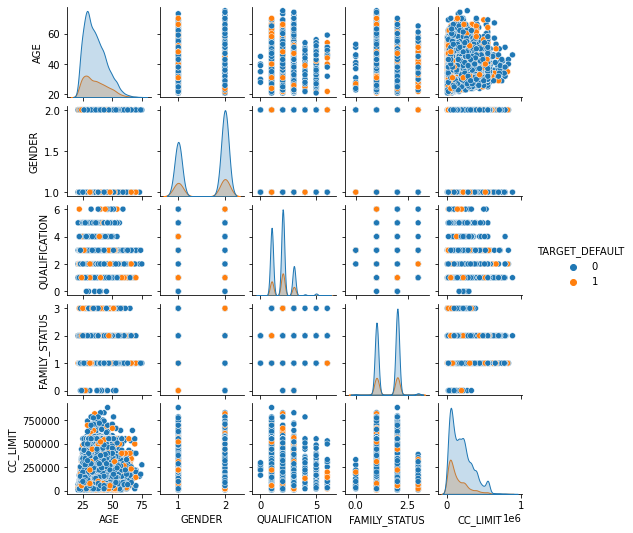

In [ ]:
# create a pairplot with the target variable
sns.pairplot(df[['AGE', 'GENDER', 'QUALIFICATION', 'FAMILY_STATUS', 'CC_LIMIT', 'TARGET_DEFAULT']],hue ='TARGET_DEFAULT',size = 1.5)
plt.show()

Try to analyse the differences as asked between 0 and 1 target classes with respect to all month columns giving transactional history. Observe what's the pattern.

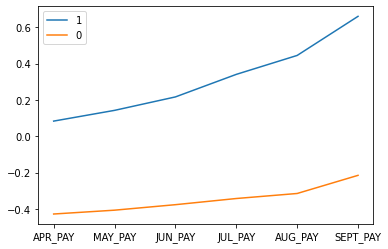

In [ ]:
# plot line graph showing mean of PAY in each month along observation for each target class 
df[df['TARGET_DEFAULT']==1][['APR_PAY', 'MAY_PAY', 'JUN_PAY', 'JUL_PAY', 'AUG_PAY', 'SEPT_PAY']].mean().plot()
df[df['TARGET_DEFAULT']==0][['APR_PAY', 'MAY_PAY', 'JUN_PAY', 'JUL_PAY', 'AUG_PAY', 'SEPT_PAY']].mean().plot()
plt.legend([1,0])
plt.show()

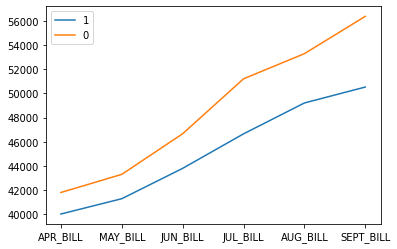

In [ ]:
# plot line graph showing mean of BILL in each month along observation for each target class 
df[df['TARGET_DEFAULT']==1][['APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL', 'SEPT_BILL']].mean().plot()
df[df['TARGET_DEFAULT']==0][['APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL', 'SEPT_BILL']].mean().plot()
plt.legend([1,0])
plt.show()

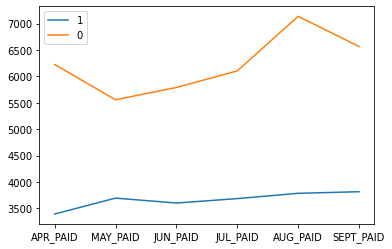

In [ ]:
# plot line graph showing mean of PAID in each month along observation for each target class 
df[df['TARGET_DEFAULT']==1][['APR_PAID', 'MAY_PAID', 'JUN_PAID', 'JUL_PAID', 'AUG_PAID', 'SEPT_PAID']].mean().plot()
df[df['TARGET_DEFAULT']==0][['APR_PAID', 'MAY_PAID', 'JUN_PAID', 'JUL_PAID', 'AUG_PAID', 'SEPT_PAID']].mean().plot()
plt.legend([1,0])
plt.show()

So, we observe following for each month:

1. PAY mean value for target class 1 is always more than that of class 0.

2. BILL mean value for target class 1 is always less than that of class 0.

3. PAID mean value for target class 1 is always less than that of class 0.

## Data Preprocessing

### Encoding Categories
Encoding categorical variables is very important if not crucial this is because machine learning models are mathematical models that use algorithms that work with numerical data types. This is why, we need encoding methods to convert non-numerical data to meaningful numerical data. For this we look at Pandas get_dummies method.

In [ ]:
# check encoding on GENDER column using pandas get_dummies method
pd.get_dummies(df["GENDER"])

,1,2
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,1,0


In [ ]:
# create dummies for categorical variables and print them
dummies = pd.get_dummies(df[['GENDER', 'QUALIFICATION', 'FAMILY_STATUS']])
print(dummies)
# concat the created dummies with the original df and drop those categorical columns
encoded_df = pd.concat([df,dummies],axis=1)
encoded_df.drop(['GENDER', 'QUALIFICATION', 'FAMILY_STATUS'],axis=1,inplace=True)
encoded_df.head()

      GENDER  QUALIFICATION  FAMILY_STATUS
0          2              1              1
1          2              1              1
2          1              1              2
3          2              1              2
4          1              2              2
...      ...            ...            ...
9995       2              3              1
9996       2              2              1
9997       1              2              1
9998       1              2              2
9999       1              2              1

[10000 rows x 3 columns]


,CUST_ID,AGE,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,AUG_PAY,SEPT_PAY,APR_BILL,...,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,TARGET_DEFAULT
0,18064,56,242550.0,-1,-1,-2,-2,-2,1,330.75,...,0.00,0.00,0.00,181.91,330.75,6492.62,0.00,0.00,0.00,0
1,24524,36,110250.0,-2,-2,0,0,0,2,0.00,...,27862.38,57013.58,104512.59,0.00,0.00,0.00,0.00,1102.50,2892.96,0
2,40165,26,88200.0,0,0,0,0,0,0,47915.75,...,76661.24,85817.50,85330.19,1653.75,2553.39,1671.39,1314.18,3099.13,3669.12,0
3,18744,28,264600.0,0,0,0,0,0,0,4983.30,...,18416.16,32092.67,33265.73,4410.00,2756.25,0.00,3865.36,4410.00,5522.42,0
4,15813,36,55125.0,-2,-2,2,2,0,0,0.00,...,54463.50,56152.53,51499.98,0.00,0.00,0.00,2205.00,0.00,5512.50,0


### Feature Scaling 
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

In [ ]:
# Creating X and Y
y = encoded_df["TARGET_DEFAULT"]
X = encoded_df.drop(["CUST_ID","TARGET_DEFAULT"],axis=1) # CUST_ID is of no use to our model so drop it
X.head(),y.head()

(   AGE  CC_LIMIT  APR_PAY  MAY_PAY  JUN_PAY  JUL_PAY  AUG_PAY  SEPT_PAY  \
 0   56  242550.0       -1       -1       -2       -2       -2         1   
 1   36  110250.0       -2       -2        0        0        0         2   
 2   26   88200.0        0        0        0        0        0         0   
 3   28  264600.0        0        0        0        0        0         0   
 4   36   55125.0       -2       -2        2        2        0         0   
 
    APR_BILL  MAY_BILL  JUN_BILL  JUL_BILL  AUG_BILL  SEPT_BILL  APR_PAID  \
 0    330.75   6492.62      0.00      0.00      0.00       0.00    181.91   
 1      0.00      0.00      0.00  27862.38  57013.58  104512.59      0.00   
 2  47915.75  57638.70  66973.57  76661.24  85817.50   85330.19   1653.75   
 3   4983.30   2227.05  15362.24  18416.16  32092.67   33265.73   4410.00   
 4      0.00      0.00      0.00  54463.50  56152.53   51499.98      0.00   
 
    MAY_PAID  JUN_PAID  JUL_PAID  AUG_PAID  SEPT_PAID  
 0    330.75   6492.62

In [ ]:
# Apply Feature Scaling using sklearn's Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

### Handling Data Imbalance

What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. Here are some of the ways you can use to handle imbalanced data.

1. Choose Proper Evaluation Metric: For an imbalanced class dataset F1 score is a more appropriate metric.
2. Use K-fold Cross-Validation in the right way. 
3. Resampling (Oversampling and Undersampling): This technique is used to upsample or downsample the minority or majority class.

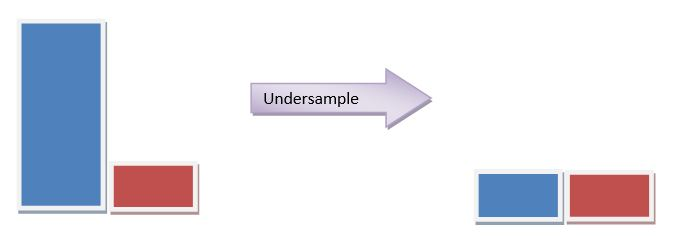

0    7781
1    2219
Name: TARGET_DEFAULT, dtype: int64


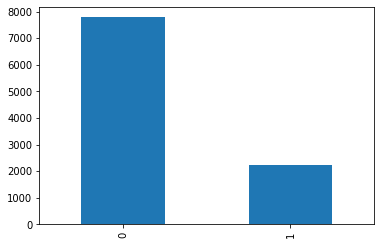

In [ ]:
# check whether the data is imbalanced 
print(encoded_df["TARGET_DEFAULT"].value_counts())
encoded_df["TARGET_DEFAULT"].value_counts().plot.bar()

Yes our dataset is imbalanced. So, we will be using Resampling approach and upsample the minority class to solve this problem. Resampling methods are used only for training sets so that we can check correctly how it works on test data so we will first split the data and then apply this method.

**Creating Training and Testing datasets** \\
We will use sklearn library for this task. We will train_test_split method from sklearn's model_selection. 

test_size is the ratio in which we want to split. Generally, it's between 0.2 and 0.33. During using this method, the data is shuffled so random_state decides which state we want to keep so that everytime we run train_test_split, it doesn't randomly split the data and keeps it same.

In [ ]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2) 

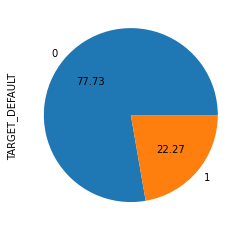

In [ ]:
# check the imbalance in y_train
y_train.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# add y_train column to X_train for resampling
X_train["TARGET_DEFAULT"] = y_train
# import resample from sklearn utils
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
majority = X_train[(X_train['TARGET_DEFAULT']==0)] 
minority = X_train[(X_train['TARGET_DEFAULT']==1)] 
# upsample minority class
minority_upsampled = resample(minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5830, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
X_train = pd.concat([minority_upsampled, majority])

In [ ]:
# preprocess X_train for training again, drop the target column and build new y_train
y_train = X_train["TARGET_DEFAULT"]
X_train.drop('TARGET_DEFAULT',axis=1,inplace=True)

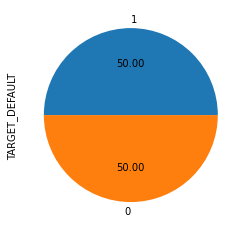

In [ ]:
y_train.value_counts().plot.pie(autopct='%.2f')

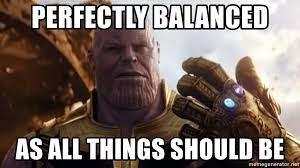

# Logistic Regression - Model Fitting

In [ ]:
# initializing Linear Regression model using sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Fitting the training data
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# print the coefficients and intercept for the model
model.coef_,model.intercept_

(array([[ 0.10094956, -0.02498134, -0.04915231,  0.0327776 ,  0.06747108,
          0.06227492,  0.165278  ,  0.55089145, -0.16422713,  0.40481975,
          0.04307038, -0.24921533, -0.09118775, -0.15341617, -0.06889275,
          0.04322006, -0.08568905, -0.20719812, -0.07370836, -0.11780577]]),
 array([-0.19359435]))

In [ ]:
# Generating Probability Predictions
y_test_prob_predictions = model.predict_proba(X_test)
y_test_prob_predictions

array([[0.74964396, 0.25035604],
       [0.52171966, 0.47828034],
       [0.44927489, 0.55072511],
       ...,
       [0.08918512, 0.91081488],
       [0.42089812, 0.57910188],
       [0.77708479, 0.22291521]])

In [ ]:
# Generating Predictions
y_test_predictions = model.predict(X_test)
y_test_predictions

array([0, 0, 1, ..., 1, 1, 0])

### Intepreting Evaluation Metrics and Analyzing training and testing errors

In [ ]:
# To check Regression model training accuracy using sklearn
model.score(X_train,y_train)

0.6736706689536878

In [ ]:
# check the model accuracy for the test data 
model.score(X_test,y_test)

0.6964

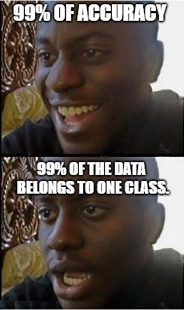

- This is absolutely fine to have such accuracy as we here teach you how you'll build ML models in your Job. 
- Many must be thinking that this is very less, but remember we also took care of imbalanced data, did necessary preprocessing, so at the end, when this model compared with any conventional model, tested against actual real-world data, our model will be more useful.
- In short, your 99% model fails in real world but this model is bringing results for your firm.

### Plotting train and test scores

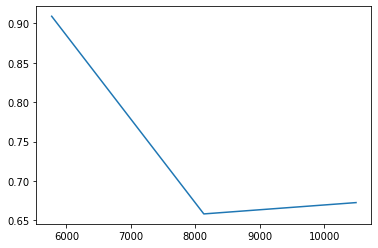

In [ ]:
# use sklearn's learning curve and plot the learning curve for training part
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, n_jobs=1)
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.show()

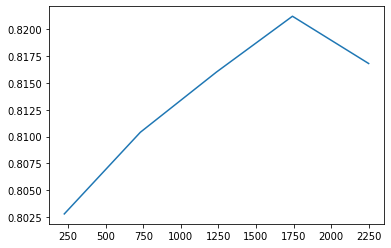

In [ ]:
# plot the learning curve for test data
test_sizes, test_score, test_scores = learning_curve(model, X_test, y_test, cv=10, n_jobs=1)
plt.plot(test_sizes,np.mean(test_scores,axis=1))
plt.show()

### Confusion Matrix and Heatmap

In [ ]:
# calculate confusion matrix using sklearn library
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_test_predictions)
cf_matrix

array([[1387,  564],
       [ 195,  354]])

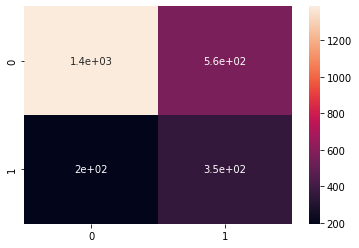

In [ ]:
# using seaborn library, plot heatmap for the confusion matrix 
sns.heatmap(cf_matrix, annot=True)

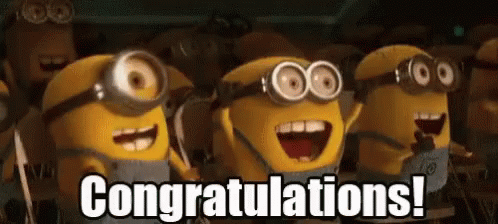

### You have successfully build Credit Card Fraud Detection model using Logistic Regression!
